In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from tabulate import tabulate

## Próbki oznaczają wagę mężczyzn

In [2]:
mu, sigma = 90, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

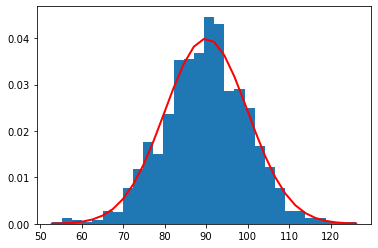

In [3]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [4]:
s2 = np.random.uniform(60,130,1000)

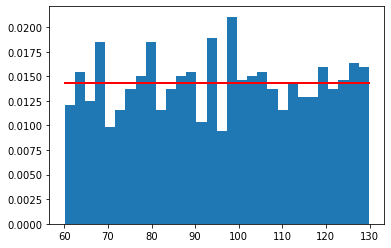

In [5]:
x = np.arange(31, dtype=float)
count, bins, ignored = plt.hist(s2, 30, density=True)
plt.plot(bins, np.full_like(x, 1/(130-60)), linewidth=2, color='r')
plt.show()

In [6]:
df = pd.DataFrame(s, columns = ["Rozkład normalny"])
df2 = pd.DataFrame(s2, columns= ["Rozkład jednostajny"])

In [7]:
df_both = pd.concat([df,df2], axis=1)
df_working_copy = df_both.copy()
df_both.describe()

,Rozkład normalny,Rozkład jednostajny
count,1000.000000,1000.000000
mean,89.838162,95.378295
std,10.097292,20.146169
min,52.799657,60.040905
25%,83.411253,78.032759
50%,90.240178,95.493048
75%,96.616495,112.603342
max,126.106046,129.858719


In [8]:
sample_to_drop = df_working_copy.sample(frac=0.1)
df90 = df_working_copy.drop(sample_to_drop.index)

In [27]:
def print_statistics(data_, label):
    i = 100
    for d in data_:
        i = i-10
        print()
        print('Tabela ' + str(i) + label)
        print(tabulate(d.describe(), headers = ['Nazwa', 'Rozkład normalny', 'Rozkład jednostajny'], tablefmt = 'fancy_grid'))

In [28]:
df80 = df90.drop(df90.sample(100).index)
df70 = df80.drop(df80.sample(100).index)
df60 = df70.drop(df70.sample(100).index)
df50 = df60.drop(df60.sample(100).index)
df40 = df50.drop(df50.sample(100).index)
df30 = df40.drop(df40.sample(100).index)
df20 = df30.drop(df30.sample(100).index)
df_dropped = [df90, df80, df70, df60, df50, df40, df30, df20]
print_statistics(df_dropped, "%")


Tabela 90%
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │           900      │              900      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │            90.0057 │               95.5289 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            10.0393 │               20.0094 │
├─────────┼────────────────────┼───────────────────────┤
│ min     │            55.8615 │               60.0409 │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │            83.5064 │               78.8144 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │            90.3423 │               95.9389 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │            96.6594 │              112.342  │
├─────────┼────────────────────┼───────────────────────┤
│ max     │        

In [10]:
def fill_df_with_mean(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.full(1000-len(data_),data_['Rozkład normalny'].mean()),
                                      'Rozkład jednostajny': np.full(1000-len(data_),data_['Rozkład jednostajny'].mean())
                                     })
                       )

In [29]:
df90_mean = fill_df_with_mean(df90)
df80_mean = fill_df_with_mean(df80)
df70_mean = fill_df_with_mean(df70)
df60_mean = fill_df_with_mean(df60)
df50_mean = fill_df_with_mean(df50)
df40_mean = fill_df_with_mean(df40)
df30_mean = fill_df_with_mean(df30)
df20_mean = fill_df_with_mean(df20)
df_mean = [df90_mean, df80_mean, df70_mean, df60_mean, df50_mean, df40_mean, df30_mean, df20_mean]
print_statistics(df_mean, "% + uzupełnienie średnią")


Tabela 90% + uzupełnienie średnią
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │         1000       │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │           90.0057  │               95.5289 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            9.52357 │               18.9815 │
├─────────┼────────────────────┼───────────────────────┤
│ min     │           55.8615  │               60.0409 │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │           84.3952  │               80.2154 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │           90.0057  │               95.5289 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │           95.6804  │              110.625  │
├─────────┼────────────────────┼─────────────────────

In [12]:
def fill_df_with_median(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.full(1000-len(data_),data_['Rozkład normalny'].median()),
                                      'Rozkład jednostajny': np.full(1000-len(data_),data_['Rozkład jednostajny'].median())
                                     })
                       )

In [31]:
df90_median = fill_df_with_median(df90)
df80_median = fill_df_with_median(df80)
df70_median = fill_df_with_median(df70)
df60_median = fill_df_with_median(df60)
df50_median = fill_df_with_median(df50)
df40_median = fill_df_with_median(df40)
df30_median = fill_df_with_median(df30)
df20_median = fill_df_with_median(df20)
df_median = [df90_median, df80_median, df70_median, df60_median, df50_median, df40_median, df30_median, df20_median]
print_statistics(df_median, "% + uzupełnienie medianą")


Tabela 90% + uzupełnienie medianą
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │         1000       │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │           90.0393  │               95.5699 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            9.52411 │               18.9819 │
├─────────┼────────────────────┼───────────────────────┤
│ min     │           55.8615  │               60.0409 │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │           84.3952  │               80.2154 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │           90.3423  │               95.9389 │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │           95.6804  │              110.625  │
├─────────┼────────────────────┼─────────────────────

In [32]:
def fill_df_with_random_numbers(data_):
    return data_.append(pd.DataFrame({
                                      'Rozkład normalny': np.random.normal(mu, sigma, 1000-len(data_)),
                                      'Rozkład jednostajny': np.random.uniform(data_['Rozkład jednostajny'].min(),data_['Rozkład jednostajny'].max(),1000-len(data_))
                                     })
                       )

In [33]:
df90_random = fill_df_with_random_numbers(df90)
df80_random = fill_df_with_random_numbers(df80)
df70_random = fill_df_with_random_numbers(df70)
df60_random = fill_df_with_random_numbers(df60)
df50_random = fill_df_with_random_numbers(df50)
df40_random = fill_df_with_random_numbers(df40)
df30_random = fill_df_with_random_numbers(df30)
df20_random = fill_df_with_random_numbers(df20)
df_random = [df90_random, df80_random, df70_random, df60_random, df50_random, df40_random, df30_random, df20_random]
print_statistics(df_random, "% + uzupełnienie losowymi wartościami")


Tabela 90% + uzupełnienie losowymi wartościami
╒═════════╤════════════════════╤═══════════════════════╕
│ Nazwa   │   Rozkład normalny │   Rozkład jednostajny │
╞═════════╪════════════════════╪═══════════════════════╡
│ count   │          1000      │             1000      │
├─────────┼────────────────────┼───────────────────────┤
│ mean    │            90.0376 │               95.0914 │
├─────────┼────────────────────┼───────────────────────┤
│ std     │            10.131  │               20.134  │
├─────────┼────────────────────┼───────────────────────┤
│ min     │            55.8615 │               60.0409 │
├─────────┼────────────────────┼───────────────────────┤
│ 25%     │            83.5144 │               77.8905 │
├─────────┼────────────────────┼───────────────────────┤
│ 50%     │            90.4304 │               95.276  │
├─────────┼────────────────────┼───────────────────────┤
│ 75%     │            96.75   │              112.142  │
├─────────┼────────────────────┼────────

In [59]:
def get_mean_std_normal(data_):
    data_mean = [d['Rozkład normalny'].mean() for d in data_]
    data_mean.reverse()
    data_mean.append(df_both['Rozkład normalny'].mean())
    data_std = [d['Rozkład normalny'].std() for d in data_]
    data_std.reverse()
    data_std.append(df_both['Rozkład normalny'].std())
    return data_mean, data_std

In [60]:
def get_mean_std_uniform(data_):
    data_mean = [d['Rozkład jednostajny'].mean() for d in data_]
    data_mean.reverse()
    data_mean.append(df_both['Rozkład jednostajny'].mean())
    data_std = [d['Rozkład jednostajny'].std() for d in data_]
    data_std.reverse()
    data_std.append(df_both['Rozkład jednostajny'].std())
    return data_mean, data_std

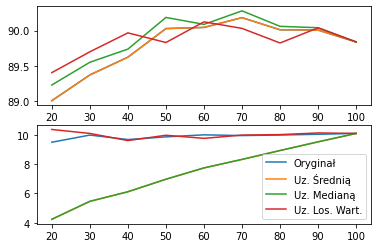

In [79]:
x = ['20', '30', '40','50','60','70','80','90','100']
df_dropped_mean, df_dropped_std = get_mean_std_normal(df_dropped)
df_mean_mean, df_mean_std = get_mean_std_normal(df_mean)
df_median_mean, df_median_std = get_mean_std_normal(df_median)
df_random_mean, df_random_std = get_mean_std_normal(df_random)

plt.subplot(2, 1, 1)
plt.plot(x, df_dropped_mean, label = "Oryginał")
plt.plot(x, df_mean_mean, label = "Uz. Średnią")
plt.plot(x, df_median_mean, label = "Uz. Medianą")
plt.plot(x, df_random_mean, label = "Uz. Los. Wart.")

plt.subplot(2, 1, 2)
plt.plot(x, df_dropped_std, label = "Oryginał")
plt.plot(x, df_mean_std, label = "Uz. Średnią")
plt.plot(x, df_median_std, label = "Uz. Medianą")
plt.plot(x, df_random_std, label = "Uz. Los. Wart.")
plt.legend()
plt.show()

In [ ]:
x = ['20', '30', '40','50','60','70','80','90','100']
df_dropped_mean, df_dropped_std = get_mean_std_uniform(df_dropped)
df_mean_mean, df_mean_std = get_mean_std_uniform(df_mean)
df_median_mean, df_median_std = get_mean_std_uniform(df_median)
df_random_mean, df_random_std = get_mean_std_uniform(df_random)
plt2.plot(x, df_dropped_mean, label = "Oryginał")
plt2.plot(x, df_mean_mean, label = "Uz. Średnią")
plt2.plot(x, df_median_mean, label = "Uz. Medianą")
plt2.plot(x, df_random_mean, label = "Uz. Los. Wart.")
plt2.legend()
plt2.show()